# Fitting Linear Models

In the previous notebook we found that we could write down a linear model, and we tried to use a Python function to solve our system. Unfortunately, because we can't right a system that has the right shape, this didn't work. Let's set up our problem again, and this time we'll solve it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

[Text(0.5, 0, 'x'), Text(0, 0.5, 'data'), Text(0.5, 1.0, 'Fake Data')]

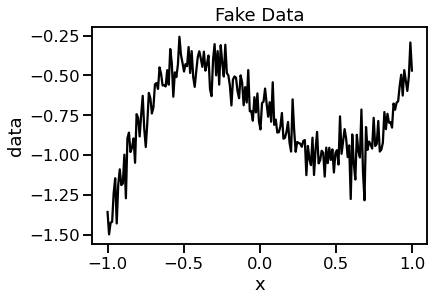

In [2]:
n = 200 # the number of data points
m = 4 # the order of our polynomial
x = np.linspace(-1, 1, n)
A = np.vstack([x**idx for idx in range(m)]).T

# In this step, I'm going to make some fake data for us to fit
true_w = np.random.normal(size=m)
data = A.dot(true_w) + np.random.normal(0, 0.1, size=x.shape[0])

fig, ax = plt.subplots()
plt.plot(x, data, c='k')
ax.set(xlabel='x', ylabel='data', title='Fake Data')

### The Normal equation

Let's unpack what we're trying to do. We have a "hypothesis" function, some function that will give us a possible set of values to fit our data. Our hypothesis here is that the data is well fit by a polynomial with some weights. Our hypothesis is a function of guess weights

$\mathbf \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ .. \\ \theta_n \end{bmatrix}$

and input regressor vectors column vectors

$\mathbf{X} = \begin{bmatrix}\mathbf x_0 & \mathbf x_1 &\mathbf x_2 & .. & \mathbf x_n  \end{bmatrix} = \begin{bmatrix} x_{0,0} & x_{0,1} & x_{0,2} & .. & x_{0,n} \\
x_{1,0} & x_{1,1} & x_{1,2} & .. & x_{1,n} \\
x_{2,0} & x_{2,1} & x_{2,2} & .. & x_{2,n} \\
.. & .. & .. & .. & .. \\
x_{m,0} & x_{m,1} & x_{m,2} & .. & x_{m,n} \\\end{bmatrix} $

Written out as an equation the hypothesis function is

$h(\theta) = \theta_0 \mathbf x_0 + \theta_1 \mathbf x_1 + \theta_2 \mathbf x_2...+ \theta_n \mathbf x_n$

The residuals between our data $\mathbf y$ and our hypothesis function is given as $\mathbf{y}$ - $\mathbf{h}_\theta(\mathbf x)$. **To find the best fitting model, we would like to minimize these residuals to fit our model.** (The best fitting model is just the model with the smallest difference to the data, i.e. the smallest residuals.) As is commonly done, we're going to minimize the square of the residuals to find the best fitting model. To do this, we have some cost function

$J(\boldsymbol \theta) = \frac{1}{2n}\sum_{i=1}^m (y_i$ - $h_\theta(x_i))^2$

where $m$ is the number of samples (i.e. how many data points we have) and n is the number of regressors we have. We'd like to minimize our cost function $J$, as this will give us the $\theta$ that reduces the residuals the most.

Our model here is simply the regressor matrix dotted with the weights, i.e. $\mathbf X \cdot \boldsymbol \theta$. So, in matrix notation the sum of the residuals can then be written as $\mathbf X \cdot \boldsymbol \theta - \mathbf y$. We now need this to be squared (we're finding the minimum value of the square of the residuals as a function of $\theta$). To get the sum of the squared values of this matrix we can take the dot product with it's transpose. Therefore we find that we can rewrite

$J(\boldsymbol \theta) = \sum_{i=1}^m (y_i$ - $h_\theta(x_i))^2 = (\mathbf X \cdot \boldsymbol \theta - \mathbf y)^T\cdot(\mathbf X \cdot \boldsymbol \theta - \mathbf y)$

(I've dropped the $\frac{1}{2n}$, you'll see why shortly.)

Now we know that our cost function is $(\mathbf X \cdot \boldsymbol \theta - \mathbf y)^T\cdot(\mathbf X \cdot \boldsymbol \theta - \mathbf y)$. For any given vector $\boldsymbol \theta$ this result of the above operation will be a single value, the sum of the square residuals.

Let's see what that looks like in the problem we set up above.

In [3]:
print('n:', n)
print('m:', m)

print('first 5 rows of our design matrix:\n', A[:5])

n: 200
m: 4
first 5 rows of our design matrix:
 [[ 1.         -1.          1.         -1.        ]
 [ 1.         -0.98994975  0.98000051 -0.97015125]
 [ 1.         -0.9798995   0.96020303 -0.94090246]
 [ 1.         -0.96984925  0.94060756 -0.91224753]
 [ 1.         -0.95979899  0.92121411 -0.88418038]]


In [4]:
# Here are some random weights
guess_weights = np.random.normal(size=m)

# Below I write the cost function
# (X.dot(theta) - y).T.dot(X.dot(theta) - y)
cost = (A.dot(guess_weights) - data)[:, None].T.dot((A.dot(guess_weights) - data)[:, None])

print("result of cost function:", cost)

result of cost function: [[132.20287039]]


Below I take random guesses at the true weights to fit our data and plot them over the measured data. I color each line by the result of the cost function $J(\boldsymbol \theta)$. You can see that closer guesses have lower values of the cost function.

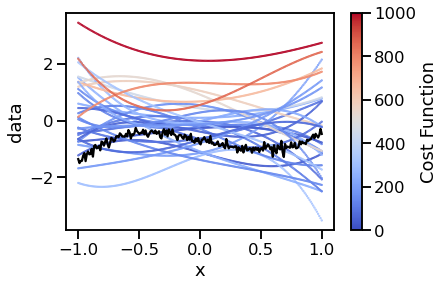

In [5]:
fig, ax = plt.subplots()
ax.plot(x, data, c='k', label='measured data')
ax.set(xlabel='x', ylabel='data')
for count in range(30):
    guess_weights = np.random.normal(size=m)
    cost = (A.dot(guess_weights) - data)[:, None].T.dot((A.dot(guess_weights) - data)[:, None])
    plt.scatter(x, A.dot(guess_weights), c=np.ones(n) * cost[0], vmin=0, vmax=1e3, s=0.5, cmap='coolwarm')
cbar = plt.colorbar()
cbar.set_label("Cost Function")

If our guess is close, this number will be close to zero.

But we don't want a function that tells us how close to the answer we are, we want the answer. What's the best fitting weight $\boldsymbol{\theta}$? We have a cost function $J (\boldsymbol \theta)$ as a function of our weights, and we want to find where this is minimized. We want to find where:

$\frac{\partial J}{\partial \boldsymbol \theta} = 0$

In other words, we have to take the partial derivative with respect to $\boldsymbol \theta$ of our function

$J (\boldsymbol \theta) = (\mathbf X \cdot \boldsymbol \theta - \mathbf y)^T\cdot(\mathbf X \cdot \boldsymbol \theta - \mathbf y)$

To get this to work, we're going to have to rearrange a little. We can rewrite this as

$J (\boldsymbol \theta) = ((\mathbf X \cdot \boldsymbol \theta)^T - \mathbf y^T)\cdot(\mathbf X \cdot \boldsymbol \theta - \mathbf y)$

and then expand


$J (\boldsymbol \theta) = ((\mathbf X \cdot \boldsymbol \theta)^T \mathbf X \cdot \boldsymbol \theta) - ((\mathbf X \cdot \boldsymbol \theta)^T \cdot \mathbf y) - (\mathbf y^T \cdot (\mathbf X \cdot \boldsymbol \theta)) + \mathbf y^T \cdot \mathbf y$

$(\mathbf X \cdot \boldsymbol \theta)$ and $\mathbf y$ are vectors (and so order of operations does not matter) so we can simplify this further into

$J (\boldsymbol \theta) = \boldsymbol \theta^T  \cdot\mathbf X^T \cdot \mathbf X \cdot \boldsymbol \theta - 2(\mathbf X \cdot \boldsymbol \theta)^T \cdot \mathbf y + \mathbf y^T \cdot \mathbf y$

Taking our partial derivative


$\frac{\partial J}{\partial \boldsymbol \theta} = 2 \cdot\mathbf X^T \cdot \mathbf X \cdot \boldsymbol \theta - 2\mathbf X^T \cdot \mathbf y$

And then to find the minimum of this function we set this to 0

$\frac{\partial J}{\partial \boldsymbol \theta} = 2 \cdot\mathbf X^T \cdot \mathbf X \cdot \boldsymbol \theta - 2\mathbf X^T \cdot \mathbf y = 0$

$2 \cdot\mathbf X^T \cdot \mathbf X \cdot \boldsymbol \theta = 2\mathbf X^T \cdot \mathbf y$

$\mathbf X^T \cdot \mathbf X \cdot \boldsymbol \theta = \mathbf X^T \cdot \mathbf y$

We can multiply both sides by $(\mathbf X^T \mathbf X)^{-1}$ in order to find $\boldsymbol \theta$ 

$\boldsymbol \theta = (\mathbf X^T \cdot \mathbf X)^{-1} \cdot  \mathbf X^T \cdot \mathbf y$

This is the so called "normal equation". Solving this will result in the best fitting weights for our system.


## Solving in `numpy`
Let's do this for our toy problem above.

To find our weights $\boldsymbol w$ we can write the normal equation as

$\boldsymbol w \cdot (\mathbf A^T \cdot \mathbf A) = \cdot  \mathbf A^T \cdot \mathbf y$

Now we can use the `numpy.linalg.solve` function, because $ (\mathbf A^T \cdot \mathbf A)$ is a square matrix.`numpy.linalg.solve` will solve systems like the ones below to find $\mathbf w$. We need to pass in a matrix and a vector. We can pass this into `numpy.linalg.solve` to solve using LU decomposition:

In [6]:
best_fitting_w = np.linalg.solve(A.T.dot(A), A.T.dot(data))

In [7]:
best_fitting_w

array([-0.67293352, -0.95440439, -0.25950084,  1.48142365])

Done! We've found our best fitting weights, let's plot them.

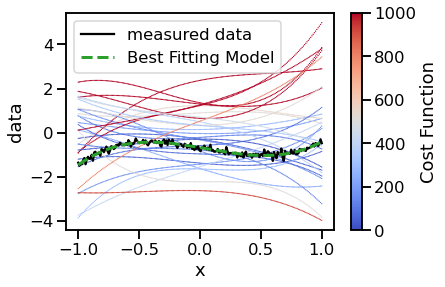

In [8]:
fig, ax = plt.subplots()
ax.plot(x, data, c='k', label='measured data')
ax.set(xlabel='x', ylabel='data')
for count in range(30):
    guess_weights = np.random.normal(size=m)
    cost = (A.dot(guess_weights) - data)[:, None].T.dot((A.dot(guess_weights) - data)[:, None])[0]
    plt.scatter(x, A.dot(guess_weights), c=np.ones(n) * cost, vmin=0, vmax=1e3, s=0.5, cmap='coolwarm', lw=0.5)
cbar = plt.colorbar()
cbar.set_label("Cost Function")

# Best fitting weights:
plt.plot(x, A.dot(best_fitting_w), color='C2', label='Best Fitting Model', lw=3, zorder=10, ls='--')
plt.legend()

We can also look at the cost function for our best fitting weights, and see it is small:

In [9]:
(A.dot(best_fitting_w) - data)[:, None].T.dot((A.dot(best_fitting_w) - data)[:, None])[0]

array([1.8691739])

And that's it! We built a model, and we fit it to our data. 

Now, you've derived and are comfortable with **Ordinary Least Squares regression (OLS)**. Nice work!

# Model predictions

Now we've created a design matrix and fit to find the weights, we have a model that can provide us with **predictions** for what the data should be at any point, so long as we can create the equivalent design matrix! 

In the case above, our design matrix $\mathbf{A}$ is just a polynomial in time, let's look at the data compared to the model:

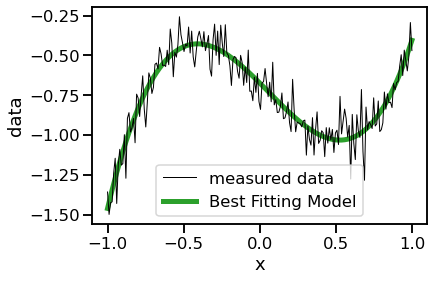

In [10]:
fig, ax = plt.subplots()
ax.plot(x, data, c='k', label='measured data', lw=1)
ax.set(xlabel='x', ylabel='data')
ax.plot(x, A.dot(best_fitting_w), color='C2', label='Best Fitting Model', lw=5, zorder=-1)
ax.legend()

Let's see what the model predicts **outside of this range!** To do this, we'll simply make a new $\mathbf{x}$ vector of new points, create a new design matrix $\mathbf{A}$ from $\mathbf{x}$, and apply the same weights.

In [11]:
# A new "x" variable, outside of our original range
x2 = np.arange(-1.2, -1, 0.01)
# Build the design matrix for this new x
A2 = np.vstack([x2**idx for idx in range(m)]).T

# Apply the same weights.
model_prediction = A2.dot(best_fitting_w)

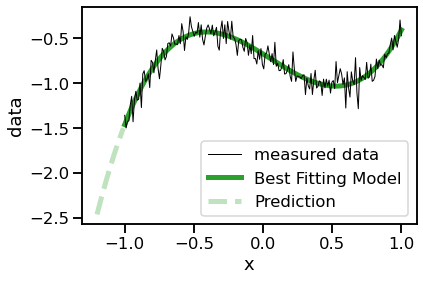

In [12]:
fig, ax = plt.subplots()
ax.plot(x, data, c='k', label='measured data', lw=1)
ax.set(xlabel='x', ylabel='data')
ax.plot(x, A.dot(best_fitting_w), color='C2', label='Best Fitting Model', lw=5, zorder=-1)
ax.plot(x2, model_prediction, color='C2', alpha=0.3, ls='--', label='Prediction', lw=5, zorder=-1)
ax.legend()

Now that we've found the weights, so long as we have values for each dimension of the model (here the only dimension is time $\mathbf{x}$) we can use those weights to create a model prediction at that location. Pretty handy, right?

<div class="admonition">
<p class="admonition-title">The Take Aways</p>
    <p> In this notebook you should <ul>
    <li>1) have understood that given some data and a model prescription with variables, we want to minimize the residuals to find the best fitting model  </li>
    <li>2) have understood the derivation of the Ordinary Least Squares equation, which gives us the weights in our model that have the lowest "cost" (i.e. that fit the data best).</li>
    <li>3) have seen that, so long as we can build a design matrix, we can use our best fit coefficients in any region. </li></ul></p>
</div>